percentage of good quality water bodies worldwide

In [1]:
#import all packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#read CSV
df_good_bodieswater = pd.read_csv("data/good_quality_water_bodies.csv")
print(df_good_bodieswater.head())

print(df_good_bodieswater.describe())

# check missing values
print("\nMissing values per column:")
print(df_good_bodieswater.isnull().sum())

display(df_good_bodieswater.head())


     Country (or area)       Year  Overall  Rivers  Open water bodies  \
0              Albania       2023    39.06   21.61               0.00   
1              Andorra  2017-2023    68.00   68.00                NaN   
2               Angola       2023    75.25  100.00                NaN   
3  Antigua and Barbuda       2023     0.00     NaN               0.00   
4           Azerbaijan       2023    56.60   57.90              53.32   

   Groundwater  
0         95.0  
1         75.0  
2         67.0  
3          NaN  
4          NaN  
          Overall      Rivers  Open water bodies  Groundwater
count  132.000000  116.000000          95.000000    92.000000
mean    63.668409   63.565517          64.300737    62.588043
std     26.233942   26.664471          35.138533    32.734584
min      0.000000    0.000000           0.000000     0.000000
25%     50.000000   47.315000          38.705000    37.725000
50%     68.725000   67.695000          70.570000    75.635000
75%     83.760000   83.67

,Country (or area),Year,Overall,Rivers,Open water bodies,Groundwater
0,Albania,2023,39.06,21.61,0.00,95.0
1,Andorra,2017-2023,68.00,68.00,NaN,75.0
2,Angola,2023,75.25,100.00,NaN,67.0
3,Antigua and Barbuda,2023,0.00,NaN,0.00,NaN
4,Azerbaijan,2023,56.60,57.90,53.32,NaN


In [3]:
# read csv
df_good_bodieswater = pd.read_csv('data/good_quality_water_bodies.csv')

# clean data 
df_good_bodieswater['Year'] = df_good_bodieswater['Year'].str.extract(r'(\d{4})').groupby(level=0).max().astype(float)
df_good_bodieswater = df_good_bodieswater.dropna(subset=['Year'])  # Remove rows with missing year
df_good_bodieswater = df_good_bodieswater.fillna(0)


#remove rows with no water quality values at all 
columns = ['Overall', 'Rivers', 'Open water bodies', 'Groundwater']
df_good_bodieswater = df_good_bodieswater[~(df_good_bodieswater[columns] == 0).all(axis=1)]  


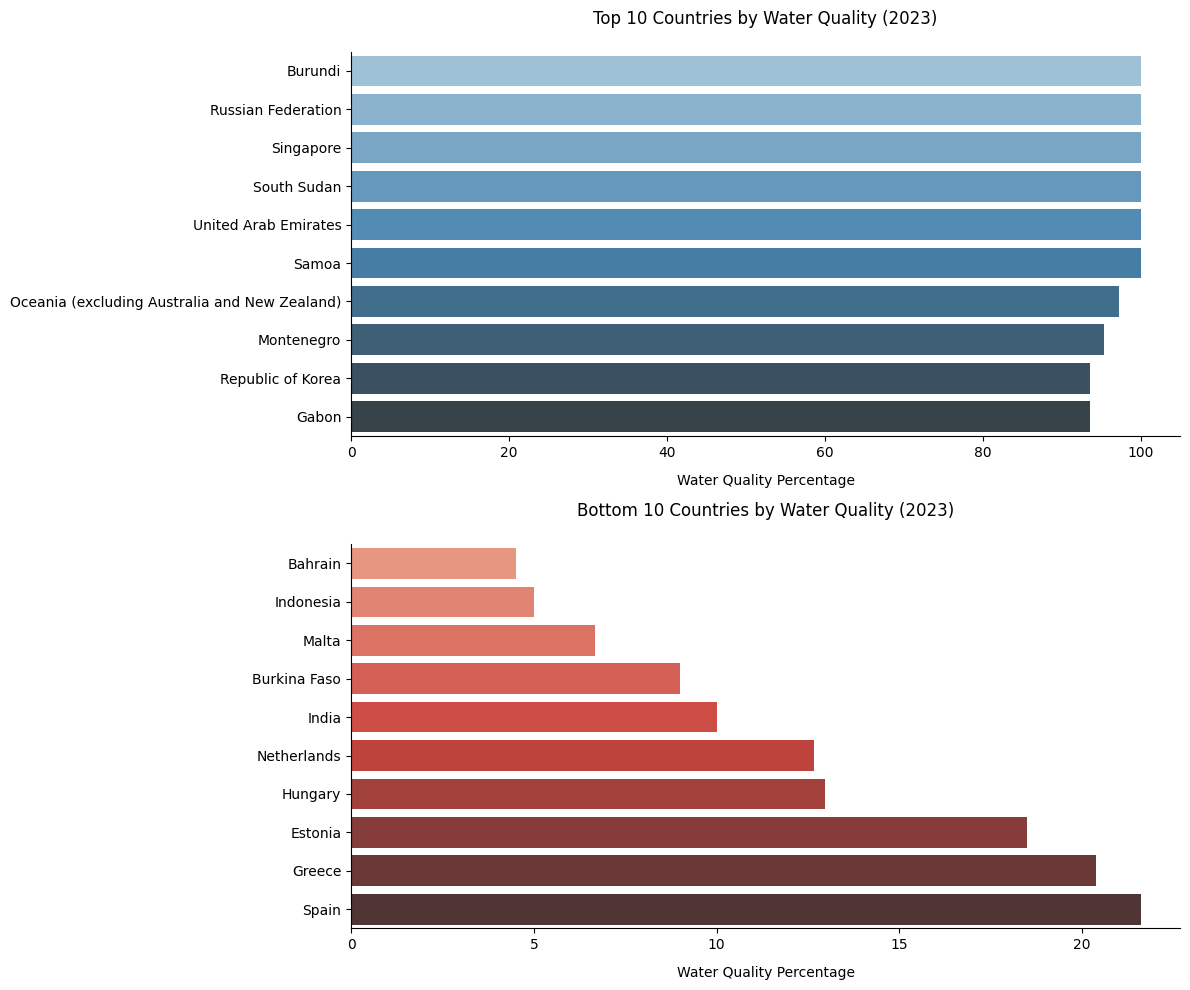

In [4]:
# Visualization 1: Best and worst 10 Countries by overall water quality in 2023
plt.figure(figsize=(12, 10))
good_quality_2023 = df_good_bodieswater[df_good_bodieswater['Year'] == 2023]

# Top 10
plt.subplot(2, 1, 1)
top10 = good_quality_2023.nlargest(10, 'Overall')
top10['Country'] = top10['Country (or area)'].astype(CategoricalDtype(categories=top10['Country (or area)'], ordered=True))
sns.barplot(x='Overall', y='Country', data=top10, palette='Blues_d')
plt.title('Top 10 Countries by Water Quality (2023)', pad=20)
plt.xlabel('Water Quality Percentage', labelpad=10)
plt.ylabel('')
sns.despine()

# Bottom 10
plt.subplot(2, 1, 2)
bottom10 = good_quality_2023.nsmallest(10, 'Overall')
bottom10['Country'] = bottom10['Country (or area)'].astype(CategoricalDtype(categories=bottom10['Country (or area)'], ordered=True))
sns.barplot(x='Overall', y='Country', data=bottom10, palette='Reds_d')
plt.title('Bottom 10 Countries by Water Quality (2023)', pad=20)
plt.xlabel('Water Quality Percentage', labelpad=10)
plt.ylabel('')
sns.despine()

plt.tight_layout()
plt.show()

C:\Users\celia\AppData\Local\Temp\ipykernel_16568\1547037610.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_quality_2023['Quality Category'] = pd.cut(good_quality_2023['Overall'], bins=bins, labels=labels)


<Figure size 1200x600 with 0 Axes>

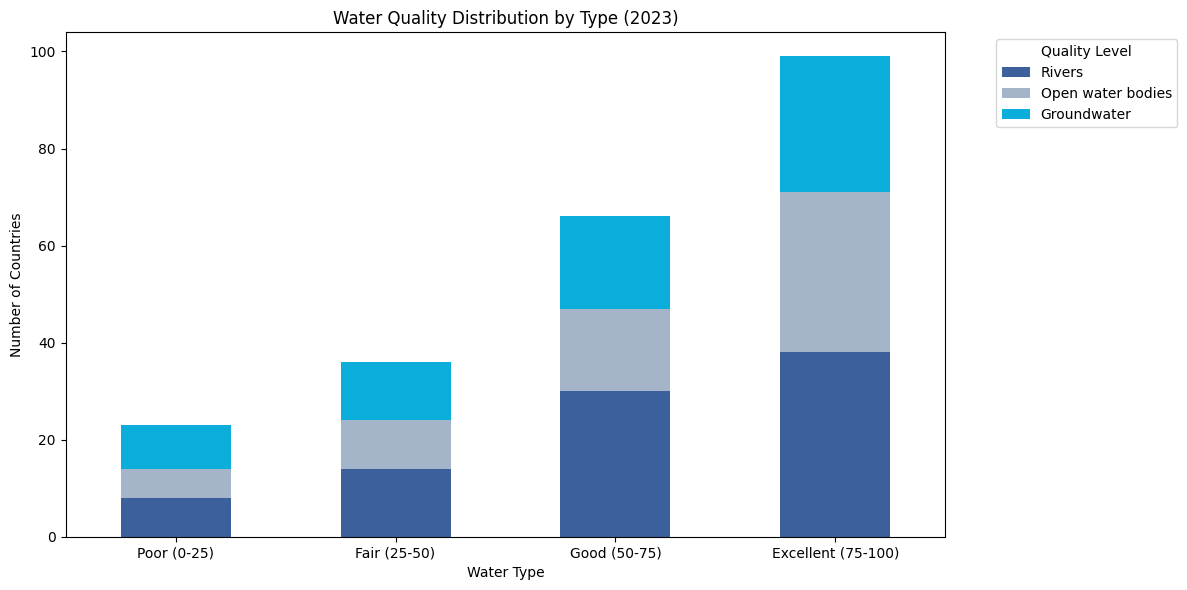

In [24]:
#Visualization 2: Stacked bar chart by quality categories
plt.figure(figsize=(12, 6))

#quality categories
bins = [0, 25, 50, 75, 100]
labels = ['Poor (0-25)', 'Fair (25-50)', 'Good (50-75)', 'Excellent (75-100)']
good_quality_2023['Quality Category'] = pd.cut(good_quality_2023['Overall'], bins=bins, labels=labels)


water_types = ['Rivers', 'Open water bodies', 'Groundwater']
stack_data = pd.DataFrame()

for wt in water_types:
    temp_df = good_quality_2023[good_quality_2023[wt] > 0]  # Only countries with data for this water type
    counts = temp_df['Quality Category'].value_counts().reindex(labels, fill_value=0)
    stack_data[wt] = counts

#create chart
stack_data.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#3B609C', '#A4B5CA', '#0BADDB'])
plt.title('Water Quality Distribution by Type (2023)')
plt.xlabel('Water Type')
plt.ylabel('Number of Countries')
plt.xticks(rotation=0)
plt.legend(title='Quality Level', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

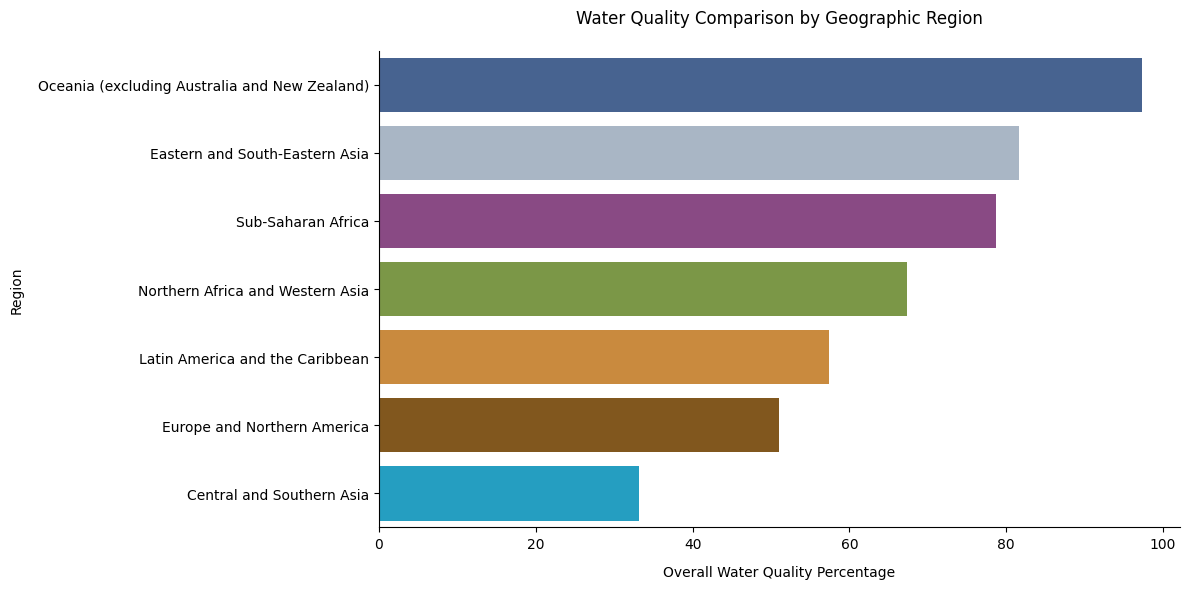

In [27]:
# Visualization 3: Geographic Regions Comparison
custom_colors = ['#3B609C', '#A4B5CA', '#933F8D', '#7FA43A', '#E08C27', '#915A0D', '#0BADDB', '#C23E1F']

regions = ['Northern Africa and Western Asia', 'Oceania (excluding Australia and New Zealand)',
           'Europe and Northern America', 'Eastern and South-Eastern Asia',
           'Central and Southern Asia', 'Sub-Saharan Africa','Latin America and the Caribbean']

region_df = df_good_bodieswater[df_good_bodieswater['Country (or area)'].isin(regions)].sort_values('Overall', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Overall', y='Country (or area)', data=region_df, palette=custom_colors[:len(region_df)])
plt.title('Water Quality Comparison by Geographic Region', pad=20)
plt.xlabel('Overall Water Quality Percentage', labelpad=10)
plt.ylabel('Region', labelpad=10)
sns.despine()
plt.tight_layout()
plt.show()

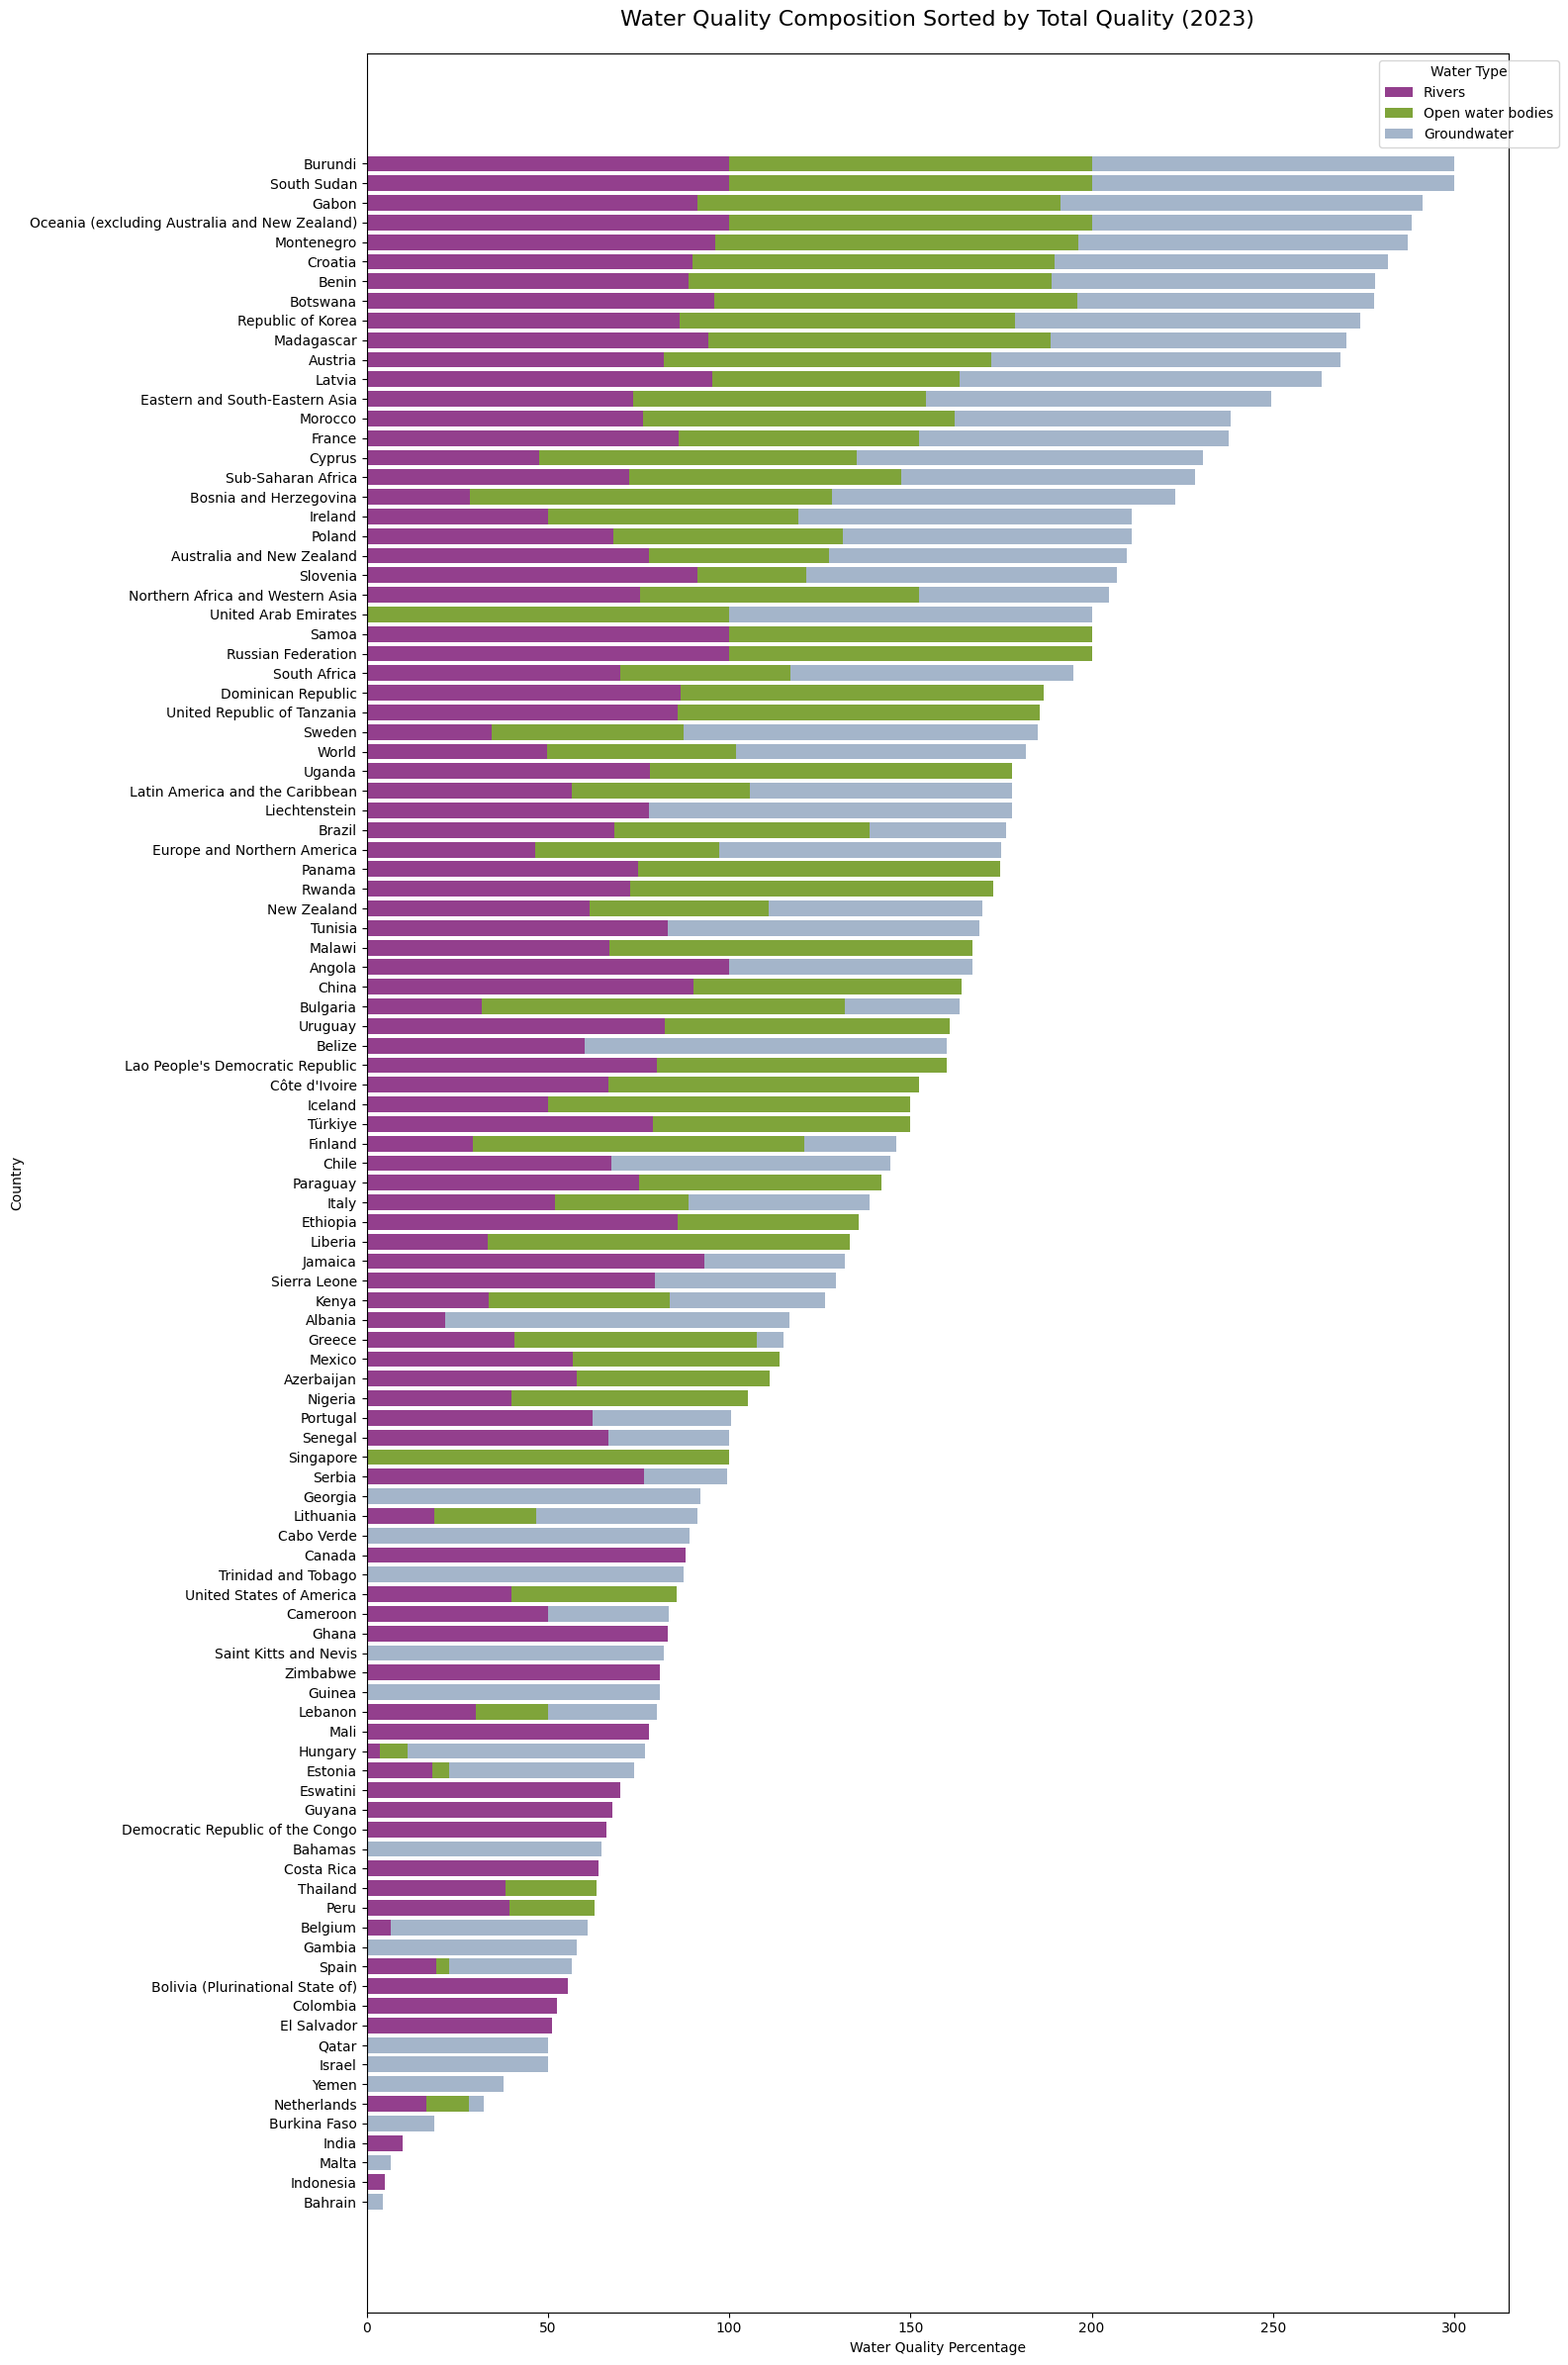

In [ ]:
# Visualization 4 : Total water quality by country 
# Melt the dataframe
melted = good_quality_2023.melt(id_vars=['Country (or area)'], value_vars=['Rivers', 'Open water bodies', 'Groundwater'], var_name='Water Type', value_name='Quality').dropna(subset=['Quality'])

# Pivot the melted data 
pivot_df = melted.pivot(index='Country (or area)', columns='Water Type', values='Quality').fillna(0)

#get total water quality and sort it 
pivot_df['Total Quality'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values(by='Total Quality', ascending=False)
pivot_df = pivot_df.drop(columns='Total Quality')

# make the plot
plt.figure(figsize=(16, 24))
colors = {'Rivers': '#933F8D','Open water bodies': '#7FA43A','Groundwater': '#A4B5CA'}

# Initialize a cumulative bottom (left for horizontal bars)
bottom = pd.Series(0, index=pivot_df.index)

for water_type in ['Rivers', 'Open water bodies', 'Groundwater']:
    plt.barh(
        pivot_df.index,
        pivot_df[water_type],
        left=bottom,
        color=colors[water_type],
        label=water_type
    )
    bottom += pivot_df[water_type]

plt.title('Water Quality Composition Sorted by Total Quality (2023)', fontsize=16, pad=20)
plt.xlabel('Water Quality Percentage')
plt.ylabel('Country')
plt.legend(title='Water Type', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.gca().invert_yaxis()  # Highest quality on top
plt.show()
